In [12]:
using VegaLite
using DataFrames

  Resolving package versions...
No Changes to `C:\Users\i am\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\i am\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\i am\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\i am\.julia\environments\v1.5\Manifest.toml`


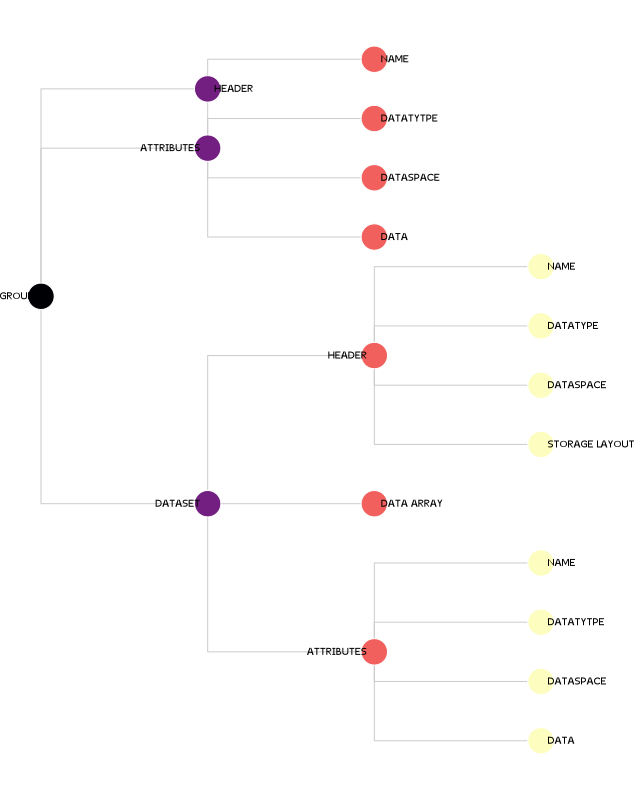

In [4]:
using CSV
mylab = CSV.read("LABELS.txt")
using VegaLite
@vgplot(
    height=800,
    marks=[
        {
            encode={
                update={
                    stroke={
                        value="#ccc"
                    },
                    path={
                        field="path"
                    }
                }
            },
            from={
                data="links"
            },
            type="path"
        },
        {
            encode={
                update={
                    x={
                        field="x"
                    },
                    fill={
                        field="depth",
                        scale="color"
                    },
                    y={
                        field="y"
                    }
                },
                enter={
                    stroke={
                        value="#fff"
                    },
                    size={
                        value=100
                    }
                }
            },
            from={
                data="tree"
            },
            type="symbol"
        },
        {
            encode={
                update={
                    align={
                        signal="datum.children ? 'right' : 'left'"
                    },
                    x={
                        field="x"
                    },
                    dx={
                        signal="datum.children ? -7 : 7"
                    },
                    opacity={
                        signal="labels ? 1 : 0"
                    },
                    y={
                        field="y"
                    }
                },
                enter={
                    fontSize={
                        value=9
                    },
                    text={
                        field="name"
                    },
                    baseline={
                        value="middle"
                    }
                }
            },
            from={
                data="tree"
            },
            type="text"
        }
    ],
    data=[
        {
            name="tree",
            values=mylab,
            transform=[
                {
                    key="id",
                    parentKey="parent",
                    type="stratify"
                },
                {
                    method={
                        signal="layout"
                    },
                    separation={
                        signal="separation"
                    },
                    as=[
                        "y",
                        "x",
                        "depth",
                        "children"
                    ],
                    size=[
                        {
                            signal="height"
                        },
                        {
                            signal="width - 100"
                        }
                    ],
                    type="tree"
                }
            ]
        },
        {
            name="links",
            source="tree",
            transform=[
                {
                    type="treelinks"
                },
                {
                    shape={
                        signal="links"
                    },
                    type="linkpath",
                    orient="horizontal"
                }
            ]
        }
    ],
    scales=[
        {
            name="color",
            zero=true,
            range={
                scheme="magma"
            },
            domain={
                data="tree",
                field="depth"
            },
            type="linear"
        }
    ],
    width=600,
    signals=[
        {
            name="labels",
            bind={
                input="checkbox"
            },
            value=true
        },
        {
            name="layout",
            bind={
                options=[
                    "tidy",
                    "cluster"
                ],
                input="radio"
            },
            value="tidy"
        },
        {
            name="links",
            bind={
                options=[
                    "line",
                    "curve",
                    "diagonal",
                    "orthogonal"
                ],
                input="select"
            },
            value="orthogonal"
        },
        {
            name="separation",
            bind={
                input="checkbox"
            },
            value=true
        }
    ]
)

In [27]:
using CSV
mylab = CSV.read("LABELS.txt")

,id,name,parent
,Int64,String,Int64?
1,1,GROUP,missing
2,2,HEADER,1
3,3,ATTRIBUTES,1
4,4,DATASET,1
5,5,NAME,3
6,6,DATATYTPE,3
7,7,DATASPACE,3
8,8,DATA,3
9,9,HEADER,4


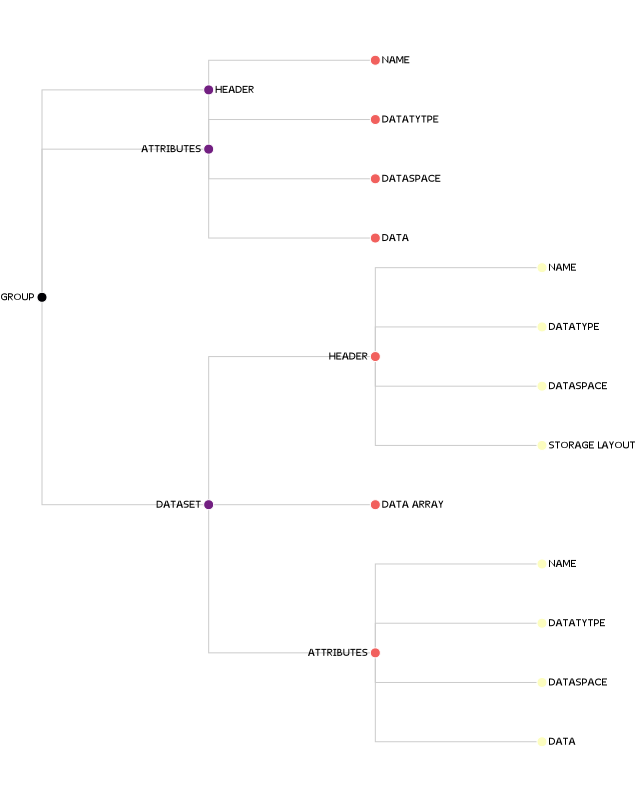

In [11]:
dataset("flare")

id,name,parent,size
1,"""flare""",#NA,#NA
2,"""analytics""",1,#NA
3,"""cluster""",2,#NA
4,"""AgglomerativeCluster""",3,3938
5,"""CommunityStructure""",3,3812
6,"""HierarchicalCluster""",3,6714
7,"""MergeEdge""",3,743
8,"""graph""",2,#NA
9,"""BetweennessCentrality""",8,3534
10,"""LinkDistance""",8,5731
